# Analisis de comportamienos de las simulaciones en Omnet++
La idea es graficar los valores de medición que permitan entender el problema de nuestra simulación.
Tenemos un emisor, una red , y un receptor/consumidor.
Podemos querer medir ditinta cosas en nuestro sistema ara tratar de entender los problemas.

Ejemplos:
1. Delay de los paquetes entre que se generan y son procesados.
2. Cantidad de paquetes generados
3. cantidad de paquetes recibidos
4. Cantidad e paquetes en buffer (del emisor, la cola y el receptor)
5. Paquetes dropeados (en la cola, en el receptor)

Esto omnet nos permite analizarlos luego, pero tiene algunas limitaciones en cruces que se pueden hacer, modos de visualizacion, etc.
Por lo que podemos exportar esos datos a un archivo csv y manipularlos con herramientas como esta. Notbooks, Python, pandas y matplotlib.


# Matplotlib

Matplotlib es probablemente el paquete de Python más utilizado para gráficos 2D. Proporciona una manera muy rápida de visualizar datos y figuras con calidad de publicación en varios formatos. 

In [2]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt # librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas # libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)


# Vamos a exportar los datos de omnet.

1. compartir archivos entre la maquina virtual y host
2. generar un archivo con datos en omnet
3. pasarlo al espacio de escritorio
4. trabajar esa data en una notebook con juypyter/jupyterlab o colab

# Añadiendo los datos exportados

In [195]:
# Podemos importar archivos a nuestro notebook con este snippet 
from google.colab import files  

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving case_II_vectors.csv to case_II_vectors (4).csv
Saving case_II_scalars.csv to case_II_scalars (3).csv
Saving case_I_vectors.csv to case_I_vectors (2).csv
Saving case_I_vectors_intv_018.csv to case_I_vectors_intv_018.csv
Saving case_I_scalars.csv to case_I_scalars (3).csv
Saving case_I_scalars_intv_018.csv to case_I_scalars_intv_018.csv
User uploaded file "case_II_vectors.csv" with length 191645 bytes
User uploaded file "case_II_scalars.csv" with length 1817 bytes
User uploaded file "case_I_vectors.csv" with length 218494 bytes
User uploaded file "case_I_vectors_intv_018.csv" with length 144307 bytes
User uploaded file "case_I_scalars.csv" with length 1822 bytes
User uploaded file "case_I_scalars_intv_018.csv" with length 2 bytes


# Obteniendo los datos

In [198]:
## Cambiar la dirección del conjunto de datos de acuerdo a dónde lo guardaron
data = pandas.read_csv('case_II_vectors.csv')
data_case_I = pandas.read_csv('case_I_vectors.csv')
data_case_I_congestion = pandas.read_csv('case_I_vectors_intv_018.csv')

In [200]:
# Podemos usar comandos de bash con el %
%ls

case_II_scalars.csv  case_I_scalars_intv_018.csv  sample_data/
case_II_vectors.csv  case_I_vectors.csv
case_I_scalars.csv   case_I_vectors_intv_018.csv


In [206]:
DATA_QUEUE = 20
REC_QUEUE = 21
SEND_QUEUE = 19

## Caso I

### Datos de la tabla

In [ ]:
## Veamos los datos en forma de tabla, e identificamos la fila y columna en donde estan mis datos de interés
data_case_I

In [181]:
## Esto nos dice las columnas de nuestra tabla
data_case_I.columns

Index(['run', 'type', 'module', 'name', 'attrname', 'attrvalue', 'value',
       'vectime', 'vecvalue'],
      dtype='object')

### Limpieza de datos

#### Filtrar DataQueue

In [207]:
# Caso I
buffer_data_queue_case_I = data_case_I['vecvalue'].loc[[DATA_QUEUE]].tolist()
time_data_queue_case_I = data_case_I['vectime'].loc[[DATA_QUEUE]].tolist()

print(buffer_data_queue_case_I)
print(time_data_queue_case_I)

['1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [208]:
# Caso I
buffer_data_queue_case_I = list(map(float, buffer_data_queue_case_I[0].split()))
time_data_queue_case_I = list(map(float, time_data_queue_case_I[0].split()))

print(time_data_queue_case_I)

[0.179687450457, 0.279687450457, 0.39513656511, 0.581096986317, 0.681096986317, 0.868573833052, 0.968573833052, 1.13519035247, 1.23519035247, 1.33519035247, 1.43519035247, 1.53519035247, 1.63519035247, 1.73519035247, 1.83519035247, 1.93519035247, 2.092874560922, 2.192874560922, 2.292874560922, 2.392874560922, 2.492874560922, 2.592874560922, 2.692874560922, 2.792874560922, 2.892874560922, 2.992874560922, 3.09643731495, 3.277274241377, 3.377274241377, 3.477274241377, 3.577274241377, 3.677274241377, 3.777274241377, 3.877274241377, 3.977274241377, 4.077274241377, 4.177274241377, 4.277274241377, 4.377274241377, 4.554933220384, 4.939455407298, 5.039455407298, 5.164150280272, 5.325550487761, 5.425550487761, 5.525550487761, 5.625550487761, 5.726187367413, 5.826187367413, 5.926187367413, 6.026187367413, 6.126187367413, 6.226187367413, 6.326187367413, 6.437671367214, 6.579807835223, 6.679807835223, 6.779807835223, 6.879807835223, 6.979807835223, 7.079807835223, 7.179807835223, 7.279807835223, 7.

#### Filtrar RecQueue

In [209]:
# Caso I
buffer_rec_queue_case_I = data_case_I['vecvalue'].loc[[REC_QUEUE]].tolist()
time_rec_queue_case_I = data_case_I['vectime'].loc[[REC_QUEUE]].tolist()

print(buffer_rec_queue_case_I)
print(time_rec_queue_case_I)

['1 1 1 1 2 2 3 3 3 4 4 5 5 6 6 7 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 17 17 18 18 18 19 19 20 20 21 21 22 22 23 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48 49 49 50 50 51 51 52 52 53 53 54 54 55 55 56 56 57 57 58 58 59 59 60 60 61 61 62 62 63 63 64 64 65 65 66 66 67 67 68 68 69 69 70 70 71 71 72 72 73 73 74 74 75 75 76 76 77 77 78 78 79 79 80 80 81 81 82 82 83 83 84 84 85 85 86 86 87 87 88 88 89 89 90 90 91 91 92 92 93 93 94 94 95 95 96 96 97 97 98 98 99 99 100 100 101 101 102 102 103 103 104 104 105 105 106 106 107 107 108 108 109 109 110 110 111 111 112 112 113 113 114 114 115 115 116 116 117 117 117 118 118 119 119 120 120 121 121 122 122 123 123 124 124 125 125 126 126 127 127 128 128 129 129 130 130 131 131 132 132 133 133 134 134 135 135 136 136 137 137 138 138 139 139 140 140 141 141 142 142 143 143 144 144 145 145 146 146 147 147 148 148 

In [210]:
# Caso I
buffer_rec_queue_case_I = list(map(float, buffer_rec_queue_case_I[0].split()))
time_rec_queue_case_I = list(map(float, time_rec_queue_case_I[0].split()))

print(time_rec_queue_case_I)

[0.279787450457, 0.379787450457, 0.49523656511, 0.681196986317, 0.781196986317, 0.968673833052, 1.068673833052, 1.23529035247, 1.33529035247, 1.43529035247, 1.53529035247, 1.63529035247, 1.73529035247, 1.83529035247, 1.93529035247, 2.03529035247, 2.192974560922, 2.292974560922, 2.392974560922, 2.492974560922, 2.592974560922, 2.692974560922, 2.792974560922, 2.892974560922, 2.992974560922, 3.092974560922, 3.19653731495, 3.377374241377, 3.477374241377, 3.577374241377, 3.677374241377, 3.777374241377, 3.877374241377, 3.977374241377, 4.077374241377, 4.177374241377, 4.277374241377, 4.377374241377, 4.477374241377, 4.655033220384, 5.039555407298, 5.139555407298, 5.264250280272, 5.425650487761, 5.525650487761, 5.625650487761, 5.725650487761, 5.826287367413, 5.926287367413, 6.026287367413, 6.126287367413, 6.226287367413, 6.326287367413, 6.426287367413, 6.537771367214, 6.679907835223, 6.779907835223, 6.879907835223, 6.979907835223, 7.079907835223, 7.179907835223, 7.279907835223, 7.379907835223, 7.

#### Filtrar SendQueue

In [211]:
# Caso I
buffer_send_queue_case_I = data_case_I['vecvalue'].loc[[SEND_QUEUE]].tolist()
time_send_queue_case_I = data_case_I['vectime'].loc[[SEND_QUEUE]].tolist()

print(buffer_send_queue_case_I)
print(time_send_queue_case_I)

['1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 2 3 3 4 4 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 3 4 3 3 4 4 4 5 6 7 7 8 8 9 9 9 7 6 6 6 7 7 7 6 6 7 8 5 5 5 5 6 6 7 8 7 8 8 9 9 9 10 11 11 7 5 6 6 7 7 7 3 3 3 4 4 5 5 6 6 7 7 8 8 8 9 9 9 10 8 8 8 7 8 9 9 9 8 9 7 4 3 3 4 1 2 2 2 2 3 4 4 5 2 3 3 4 4 5 5 6 5 5 4 4 5 5 5 5 4 5 5 6 4 5 4 4 5 3 4 4 5 5 4 5 5 5 4 5 5 6 7 7 7 8 9 8 8 9 10 10 10 11 11 10 11 9 9 10 10 10 10 10 9 9 9 10 9 7 7 7 7 6 4 3 4 5 5 4 4 5 5 4 4 4 5 4 2 1 1 1 1 1 2 1 1 1 2 2 2 2 3 4 4 5 4 4 5 6 6 6 6 6 5 6 7 7 8 9 9 9 9 10 11 10 8 8 9 9 10 8 9 10 11 11 8 7 8 7 7 7 7 8 9 8 8 8 8 2 2 2 1 1 1 2 3 3 3 4 4 3 2 1 2 2 3 3 4 5 2 2 2 3 3 3 4 3 3 1 2 1 2 3 2 3 1 1 1 1 2 2 2 3 4 5 6 7 7 7 7 8 7 7 6 4 4 4 4 5 4 5 5 5 6 7 6 7 3 1 2 2 2 2 1 1 1 1 1 1 1 2 3 3 4 5 6 4 4 4 4 4 2 3 2 3 4 5 6 6 7 7 6 6 3 4 4 5 5 6 5 6 5 5 6 6 6 6 6 5 5 1 1 2 3 2 1 2 3 4 4 4 3 3 2 3 3 3 3 2 3 3 4 3 3 4 4 4 3 3 3 1 2 1 2 3 2 1 1 1 1 1 2 3 1 1 1 2 2 3 3 4 4 4 4 4 5 6 7 7 6 5 5 6 6 6 6 7 

In [212]:
# Caso I
buffer_send_queue_case_I = list(map(float, buffer_send_queue_case_I[0].split()))
time_send_queue_case_I = list(map(float, time_send_queue_case_I[0].split()))

print(time_send_queue_case_I)

[0.079587450457, 0.169443489305, 0.29503656511, 0.480996986317, 0.573319299464, 0.768473833052, 0.84719394705, 1.03509035247, 1.090195201137, 1.187895843776, 1.291711773842, 1.340224590214, 1.397776509902, 1.433092423816, 1.65544486602, 1.661283332929, 1.992774560922, 2.024610175006, 2.072970385501, 2.137915020326, 2.294804632088, 2.46202575212, 2.537293163451, 2.602681420173, 2.686624705463, 2.736511906365, 2.99633731495, 3.177174241377, 3.184542776924, 3.225700576548, 3.23481667916, 3.339277929991, 3.341320488831, 3.387245302557, 3.565994068901, 3.881011061769, 4.031589487633, 4.046712572999, 4.250743998793, 4.454833220384, 4.839355407298, 4.903526324566, 5.064050280272, 5.225450487761, 5.287343433724, 5.360839875843, 5.512493473242, 5.626087367413, 5.638674808357, 5.766197578579, 5.868340766014, 5.955572885518, 5.971045853568, 6.048129319415, 6.337571367214, 6.479707835223, 6.553490564399, 6.564685180462, 6.618241752485, 6.682411222688, 6.713139257903, 6.733759586106, 6.882585068681

## Caso I sin congestión Intervalo = 0.18

### Datos de la tabla

In [ ]:
## Veamos los datos en forma de tabla, e identificamos la fila y columna en donde estan mis datos de interés
data_case_I_congestion

In [204]:
## Esto nos dice las columnas de nuestra tabla
data_case_I_congestion.columns

Index(['run', 'type', 'module', 'name', 'attrname', 'attrvalue', 'value',
       'vectime', 'vecvalue'],
      dtype='object')

### Limpieza de datos

#### Filtrar DataQueue

In [228]:
# Caso I con congestión
buffer_data_queue_case_I_cong = data_case_I_congestion['vecvalue'].loc[[DATA_QUEUE]].tolist()
time_data_queue_case_I_cong = data_case_I_congestion['vectime'].loc[[DATA_QUEUE]].tolist()

print(buffer_data_queue_case_I_cong)
print(time_data_queue_case_I_cong)

['1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [229]:
# Caso I con congestión
buffer_data_queue_case_I_cong = list(map(float, buffer_data_queue_case_I_cong[0].split()))
time_data_queue_case_I_cong = list(map(float, time_data_queue_case_I_cong[0].split()))

print(time_data_queue_case_I_cong)

[0.243357410822, 0.405098280749, 0.631165817198, 0.965894575371, 1.132074739036, 1.483352899495, 1.625049104692, 1.963262634448, 2.063262634448, 2.2383125188, 2.425181192919, 2.525181192919, 2.625181192919, 2.725181192919, 3.07990075884, 3.17990075884, 3.687094209664, 3.787094209664, 3.887094209664, 3.987094209664, 4.230748337764, 4.531746353822, 4.667227694218, 4.784926556318, 4.93602446984, 5.03602446984, 5.493507166916, 5.819013634485, 5.919013634485, 6.019013634485, 6.119013634485, 6.219013634485, 6.319013634485, 6.419013634485, 6.519013634485, 7.085919911189, 7.356961077744, 7.456961077744, 7.751439197834, 8.118799796698, 8.810939733144, 8.926447384226, 9.215390504497, 9.505910877978, 9.617318180711, 9.749611776525, 10.022588251843, 10.227057261351, 10.327057261351, 10.47925564145, 10.663113378833, 10.820131193941, 10.920131193941, 11.020131193941, 11.507728460993, 11.76357410341, 11.896383015926, 11.996383015926, 12.096383015926, 12.196383015926, 12.296383015926, 12.396383015926,

#### Filtrar RecQueue

In [226]:
# Caso II con congestión
buffer_rec_queue_case_I_cong = data_case_I_congestion['vecvalue'].loc[[REC_QUEUE]].tolist()
time_rec_queue_case_I_cong = data_case_I_congestion['vectime'].loc[[REC_QUEUE]].tolist()

print(buffer_rec_queue_case_I_cong)
print(time_rec_queue_case_I_cong)

['1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 1 1 2 2 2 2 2 2 3 3 2 1 2 2 3 3 4 4 5 3 3 3 3 2 1 1 1 1 1 1 1 1 1 2 2 2 2 3 1 1 2 2 3 3 4 4 5 4 5 5 6 6 7 7 8 8 9 9 10 10 9 8 8 9 9 9 10 9 9 9 10 8 8 9 9 9 10 10 11 11 12 12 13 13 14 14 15 15 12 10 11 11 12 12 13 9 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 16 15 16 16 15 16 16 17 17 17 17 15 13 12 12 13 10 11 11 12 12 12 13 13 14 12 13 13 14 14 15 15 16 15 16 15 15 16 16 17 17 16 17 17 18 16 17 16 16 17 16 16 17 17 18 17 18 18 18 18 18 19 19 20 20 21 21 22 22 23 23 24 24 25 25 25 25 26 24 24 25 25 25 26 26 25 25 25 26 25 23 23 24 24 23 21 21 21 22 22 22 22 23 23 22 22 23 23 22 20 20 20 20 20 21 21 19 20 20 21 21 21 21 22 22 23 23 24 24 24 25 25 26 26 26 25 26 26 27 27 28 28 29 29 30 30 31 29 29 30 30 31 30 30 31 31 32 30 29 30 29 30 30 30 31 31 31 31 31 31 26 26 26 25 25 25 26 26 27 27 28 28 28 27 26 27 27 28 28 29 29 28 28 28 29 29 29 30 29 30 27 28 28 28 29 29 30 28 28 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 34 32 33 33 33 33 33 34 34 35 

In [227]:
# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos

# Caso II con congestión
buffer_rec_queue_case_I_cong = list(map(float, buffer_rec_queue_case_I_cong[0].split()))
time_rec_queue_case_I_cong = list(map(float, time_rec_queue_case_I_cong[0].split()))

print(time_rec_queue_case_I_cong)

[0.343457410822, 0.505198280749, 0.731265817198, 1.065994575371, 1.232174739036, 1.583452899495, 1.725149104692, 2.063362634448, 2.163362634448, 2.3384125188, 2.525281192919, 2.625281192919, 2.725281192919, 2.825281192919, 3.18000075884, 3.28000075884, 3.787194209664, 3.887194209664, 3.987194209664, 4.087194209664, 4.330848337764, 4.631846353822, 4.767327694218, 4.885026556318, 5.03612446984, 5.13612446984, 5.593607166916, 5.919113634485, 6.019113634485, 6.119113634485, 6.219113634485, 6.319113634485, 6.419113634485, 6.519113634485, 6.619113634485, 7.186019911189, 7.457061077744, 7.557061077744, 7.851539197834, 8.218899796698, 8.911039733144, 9.026547384226, 9.315490504497, 9.606010877978, 9.717418180711, 9.849711776525, 10.122688251843, 10.327157261351, 10.427157261351, 10.57935564145, 10.763213378833, 10.920231193941, 11.020231193941, 11.120231193941, 11.607828460993, 11.86367410341, 11.996483015926, 12.096483015926, 12.196483015926, 12.296483015926, 12.396483015926, 12.496483015926,

#### Filtrar SendQueue

In [230]:
# Caso I
buffer_send_queue_case_I_cong = data_case_I_congestion['vecvalue'].loc[[SEND_QUEUE]].tolist()
time_send_queue_case_I_cong = data_case_I_congestion['vectime'].loc[[SEND_QUEUE]].tolist()

print(buffer_send_queue_case_I_cong)
print(time_send_queue_case_I_cong)

['1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 3 2 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 3 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 1 1 1 2 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 3 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 3 3 3 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 3 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 3 3 4 5 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 3 1 1 1 1 1 1 1 1 1 2 3 4 4 3 4 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 3 3 

In [231]:
# Caso I
buffer_send_queue_case_I_cong = list(map(float, buffer_send_queue_case_I_cong[0].split()))
time_send_queue_case_I_cong = list(map(float, time_send_queue_case_I_cong[0].split()))

print(time_send_queue_case_I_cong)

[0.143257410822, 0.304998280749, 0.531065817198, 0.865794575371, 1.031974739036, 1.383252899495, 1.524949104692, 1.863162634448, 1.962351362049, 2.1382125188, 2.325081192919, 2.412404262389, 2.515997717828, 2.579566362873, 2.97980075884, 2.990309999277, 3.586994209664, 3.644298315016, 3.731346693907, 3.848247036592, 4.130648337764, 4.431646353822, 4.567127694218, 4.684826556318, 4.83592446984, 4.925721431463, 5.393407166916, 5.718913634485, 5.732176998469, 5.806261037793, 5.822670022495, 6.01070027399, 6.014376879902, 6.097041544608, 6.418789324027, 6.985819911189, 7.256861077744, 7.284082631404, 7.651339197834, 8.018699796698, 8.710839733144, 8.826347384226, 9.115290504497, 9.405810877978, 9.517218180711, 9.649511776525, 9.922488251843, 10.126957261351, 10.14961465505, 10.37915564145, 10.563013378833, 10.720031193941, 10.747882536431, 10.886632774955, 11.407628460993, 11.66347410341, 11.796283015926, 11.81643332484, 11.912835154481, 12.028340200847, 12.083650664234, 12.120767254999, 1

## Caso II

### Datos de la tabla

In [ ]:
## Veamos los datos en forma de tabla, e identificamos la fila y columna en donde estan mis datos de interés
data

In [202]:
## Esto nos dice las columnas de nuestra tabla
data.columns

Index(['run', 'type', 'module', 'name', 'attrname', 'attrvalue', 'value',
       'vectime', 'vecvalue'],
      dtype='object')

### Limpieza de datos
Las siguientes lineas las utilizamos para limpiar los datos que nos sean de interes.

#### Filtrar DataQueue

In [156]:
# Caso II
buffer_data_queue = data['vecvalue'].loc[[DATA_QUEUE]].tolist()
time_data_queue = data['vectime'].loc[[DATA_QUEUE]].tolist()

print(buffer_data_queue)
print(time_data_queue)

['1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [157]:
# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos

# Caso II
buffer_data_queue = list(map(float, buffer_data_queue[0].split()))
time_data_queue = list(map(float, time_data_queue[0].split()))

print(time_data_queue)

[0.179687450457, 0.279687450457, 0.39513656511, 0.581096986317, 0.681096986317, 0.868573833052, 0.968573833052, 1.13519035247, 1.23519035247, 1.33519035247, 1.43519035247, 1.53519035247, 1.63519035247, 1.73519035247, 1.83519035247, 1.93519035247, 2.092874560922, 2.192874560922, 2.292874560922, 2.392874560922, 2.492874560922, 2.592874560922, 2.692874560922, 2.792874560922, 2.892874560922, 2.992874560922, 3.09643731495, 3.277274241377, 3.377274241377, 3.477274241377, 3.577274241377, 3.677274241377, 3.777274241377, 3.877274241377, 3.977274241377, 4.077274241377, 4.177274241377, 4.277274241377, 4.377274241377, 4.554933220384, 4.939455407298, 5.039455407298, 5.164150280272, 5.325550487761, 5.425550487761, 5.525550487761, 5.625550487761, 5.726187367413, 5.826187367413, 5.926187367413, 6.026187367413, 6.126187367413, 6.226187367413, 6.326187367413, 6.437671367214, 6.579807835223, 6.679807835223, 6.779807835223, 6.879807835223, 6.979807835223, 7.079807835223, 7.179807835223, 7.279807835223, 7.

#### Filtrar RecQueue

In [158]:
# Caso II
buffer_rec_queue = data['vecvalue'].loc[[REC_QUEUE]].tolist()
time_rec_queue = data['vectime'].loc[[REC_QUEUE]].tolist()

print(buffer_rec_queue)
print(time_rec_queue)

['1 1 1 1 2 2 3 3 3 4 4 5 5 6 6 7 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 17 17 18 18 18 19 19 20 20 21 21 22 22 23 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48 49 49 50 50 51 51 52 52 53 53 54 54 55 55 56 56 57 57 58 58 59 59 60 60 61 61 62 62 63 63 64 64 65 65 66 66 67 67 68 68 69 69 70 70 71 71 72 72 73 73 74 74 75 75 76 76 77 77 78 78 79 79 80 80 81 81 82 82 83 83 84 84 85 85 86 86 87 87 88 88 89 89 90 90 91 91 92 92 93 93 94 94 95 95 96 96 97 97 98 98 99 99 100 100 101 101 102 102 103 103 104 104 105 105 106 106 107 107 108 108 109 109 110 110 111 111 112 112 113 113 114 114 115 115 116 116 117 117 117 118 118 119 119 120 120 121 121 122 122 123 123 124 124 125 125 126 126 127 127 128 128 129 129 130 130 131 131 132 132 133 133 134 134 135 135 136 136 137 137 138 138 139 139 140 140 141 141 142 142 143 143 144 144 145 145 146 146 147 147 148 148 

In [165]:
# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos

# Caso II
buffer_rec_queue = list(map(float, buffer_rec_queue[0].split()))
time_rec_queue = list(map(float, time_rec_queue[0].split()))

print(time_rec_queue)

[0.279787450457, 0.379787450457, 0.49523656511, 0.681196986317, 0.781196986317, 0.968673833052, 1.068673833052, 1.23529035247, 1.33529035247, 1.43529035247, 1.53529035247, 1.63529035247, 1.73529035247, 1.83529035247, 1.93529035247, 2.03529035247, 2.192974560922, 2.292974560922, 2.392974560922, 2.492974560922, 2.592974560922, 2.692974560922, 2.792974560922, 2.892974560922, 2.992974560922, 3.092974560922, 3.19653731495, 3.377374241377, 3.477374241377, 3.577374241377, 3.677374241377, 3.777374241377, 3.877374241377, 3.977374241377, 4.077374241377, 4.177374241377, 4.277374241377, 4.377374241377, 4.477374241377, 4.655033220384, 5.039555407298, 5.139555407298, 5.264250280272, 5.425650487761, 5.525650487761, 5.625650487761, 5.725650487761, 5.826287367413, 5.926287367413, 6.026287367413, 6.126287367413, 6.226287367413, 6.326287367413, 6.426287367413, 6.537771367214, 6.679907835223, 6.779907835223, 6.879907835223, 6.979907835223, 7.079907835223, 7.179907835223, 7.279907835223, 7.379907835223, 7.

#### Filtrar SendQueue

In [183]:
# Caso II
buffer_send_queue = data['vecvalue'].loc[[SEND_QUEUE]].tolist()
time_send_queue = data['vectime'].loc[[SEND_QUEUE]].tolist()

print(buffer_send_queue)
print(time_send_queue)

['1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 2 1 1 2 2 1 1 1 1 2 2 1 1 1 2 3 3 4 4 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 3 4 3 3 4 4 4 5 6 7 7 8 8 9 9 9 7 6 6 6 7 7 7 6 6 7 8 5 5 5 5 6 6 7 8 7 8 8 9 9 9 10 11 11 7 5 6 6 7 7 7 3 3 3 4 4 5 5 6 6 7 7 8 8 8 9 9 9 10 8 8 8 7 8 9 9 9 8 9 7 4 3 3 4 1 2 2 2 2 3 4 4 5 2 3 3 4 4 5 5 6 5 5 4 4 5 5 5 5 4 5 5 6 4 5 4 4 5 3 4 4 5 5 4 5 5 5 4 5 5 6 7 7 7 8 9 8 8 9 10 10 10 11 11 10 11 9 9 10 10 10 10 10 9 9 9 10 9 7 7 7 7 6 4 3 4 5 5 4 4 5 5 4 4 4 5 4 2 1 1 1 1 1 2 1 1 1 2 2 2 2 3 4 4 5 4 4 5 6 6 6 6 6 5 6 7 7 8 9 9 9 9 10 11 10 8 8 9 9 10 8 9 10 11 11 8 7 8 7 7 7 7 8 9 8 8 8 8 2 2 2 1 1 1 2 3 3 3 4 4 3 2 1 2 2 3 3 4 5 2 2 2 3 3 3 4 3 3 1 2 1 2 3 2 3 1 1 1 1 2 2 2 3 4 5 6 7 7 7 7 8 7 7 6 4 4 4 4 5 4 5 5 5 6 7 6 7 3 1 2 2 2 2 1 1 1 1 1 1 1 2 3 3 4 5 6 4 4 4 4 4 2 3 2 3 4 5 6 6 7 7 6 6 3 4 4 5 5 6 5 6 5 5 6 6 6 6 6 5 5 1 1 2 3 2 1 2 3 4 4 4 3 3 2 3 3 3 3 2 3 3 4 3 3 4 4 4 3 3 3 1 2 1 2 3 2 1 1 1 1 1 2 3 1 1 1 2 2 3 3 4 4 4 4 4 5 6 7 7 6 5 5 6 6 6 6 7 

In [184]:
# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos

# Caso II
buffer_send_queue = list(map(float, buffer_send_queue[0].split()))
time_send_queue = list(map(float, time_send_queue[0].split()))

print(time_send_queue)

[0.079587450457, 0.169443489305, 0.29503656511, 0.480996986317, 0.573319299464, 0.768473833052, 0.84719394705, 1.03509035247, 1.090195201137, 1.187895843776, 1.291711773842, 1.340224590214, 1.397776509902, 1.433092423816, 1.65544486602, 1.661283332929, 1.992774560922, 2.024610175006, 2.072970385501, 2.137915020326, 2.294804632088, 2.46202575212, 2.537293163451, 2.602681420173, 2.686624705463, 2.736511906365, 2.99633731495, 3.177174241377, 3.184542776924, 3.225700576548, 3.23481667916, 3.339277929991, 3.341320488831, 3.387245302557, 3.565994068901, 3.881011061769, 4.031589487633, 4.046712572999, 4.250743998793, 4.454833220384, 4.839355407298, 4.903526324566, 5.064050280272, 5.225450487761, 5.287343433724, 5.360839875843, 5.512493473242, 5.626087367413, 5.638674808357, 5.766197578579, 5.868340766014, 5.955572885518, 5.971045853568, 6.048129319415, 6.337571367214, 6.479707835223, 6.553490564399, 6.564685180462, 6.618241752485, 6.682411222688, 6.713139257903, 6.733759586106, 6.882585068681

## Ejemplo de filtro

In [ ]:
# Omnet guarda los valores de nuestro "vector" (lista de valores) en una celda, por lo que tengo que esxtraer estos valores
# time_gen = data['vectime'].loc[[23]].tolist()
# buffer_gen = data['vecvalue'].loc[[23]].tolist()

# time_queue = data['vectime'].loc[[24]].tolist()
# buffer_queue = data['vecvalue'].loc[[24]].tolist()

# time_sink = data['vectime'].loc[[25]].tolist()
# buffer_sink = data['vecvalue'].loc[[25]].tolist()

# print(time_gen)
# print(buffer_gen)
# print(time_queue)
# print(buffer_queue)
# print(time_sink)
# print(buffer_sink)

# Gráficos

**¿Qué queremos graficar?**

El estado de las 3 queue (*DataQueue, RecQueue, SendQueue*):

**REQ: Cantidad de paquetes en la cola**

En dos casos:
  1. Con congestión
    1. Caso I
    2. Caso II
  2. Sin congestión de cualquiera de los dos casos.


## Caso I

### Gráficos de DataQueue

Max buffer: 1.0
Min buffer: 1.0


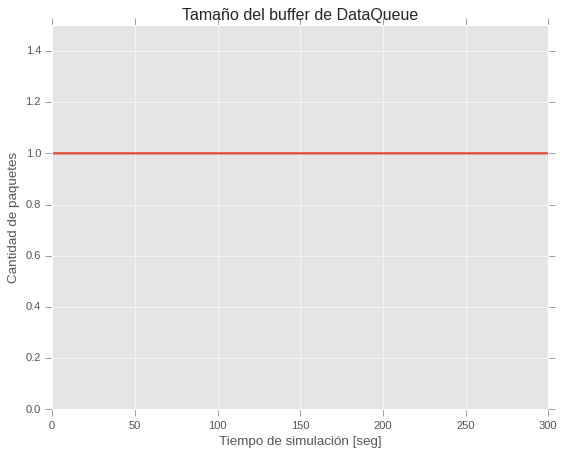

In [194]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer de DataQueue")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 1.5]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_data_queue_case_I, buffer_data_queue_case_I)

print(f"Max buffer: {max(buffer_data_queue_case_I)}")
print(f"Min buffer: {min(buffer_data_queue_case_I)}")

### Gráficos de RecQueue

Max buffer: 200.0
Min buffer: 1.0


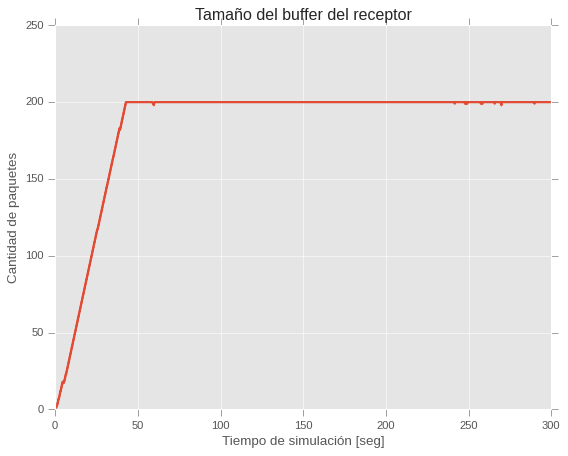

In [190]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del receptor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 250]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_rec_queue_case_I, buffer_rec_queue_case_I)

print(f"Max buffer: {max(buffer_rec_queue_case_I)}")
print(f"Min buffer: {min(buffer_rec_queue_case_I)}")

### Gráficos de SendQueue

Max buffer: 33.0
Min buffer: 1.0


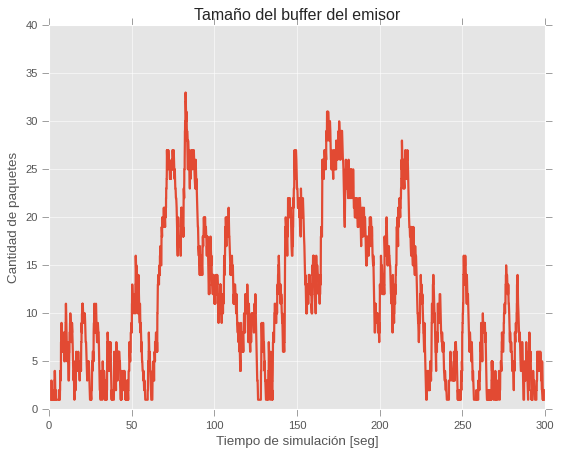

In [173]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del emisor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 40])  # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_send_queue_case_I, buffer_send_queue_case_I)

print(f"Max buffer: {max(buffer_send_queue_case_I)}")
print(f"Min buffer: {min(buffer_send_queue_case_I)}")

## Caso I sin congestión

### Gráficos de DataQueue

Max buffer: 10.0
Min buffer: 1.0


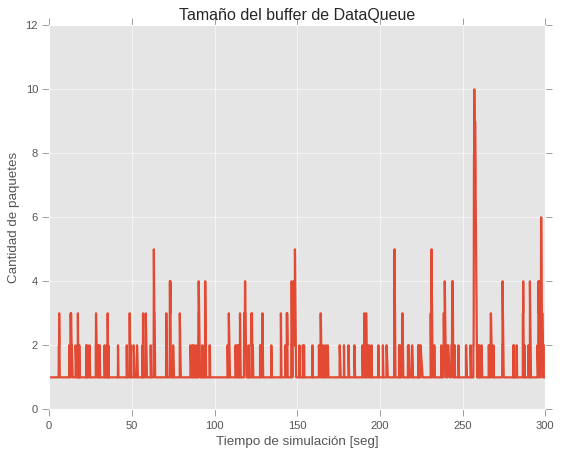

In [225]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer de DataQueue")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 12]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_data_queue_case_I_cong, buffer_data_queue_case_I_cong)

print(f"Max buffer: {max(buffer_data_queue_case_I_cong)}")
print(f"Min buffer: {min(buffer_data_queue_case_I_cong)}")

### Gráficos de RecQueue

Max buffer: 167.0
Min buffer: 1.0


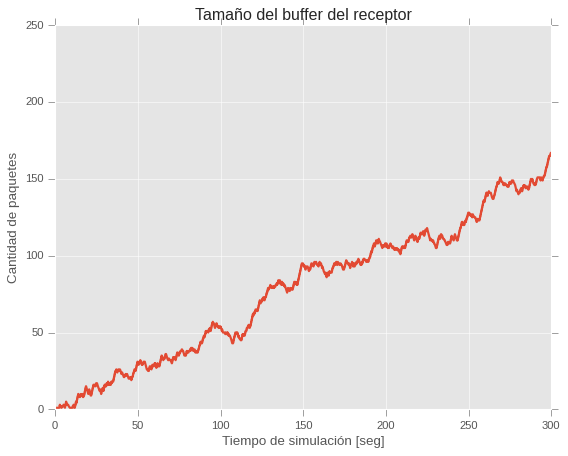

In [232]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del receptor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 250]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_rec_queue_case_I_cong, buffer_rec_queue_case_I_cong)

print(f"Max buffer: {max(buffer_rec_queue_case_I_cong)}")
print(f"Min buffer: {min(buffer_rec_queue_case_I_cong)}")

### Gráficos de SendQueue

Max buffer: 33.0
Min buffer: 1.0


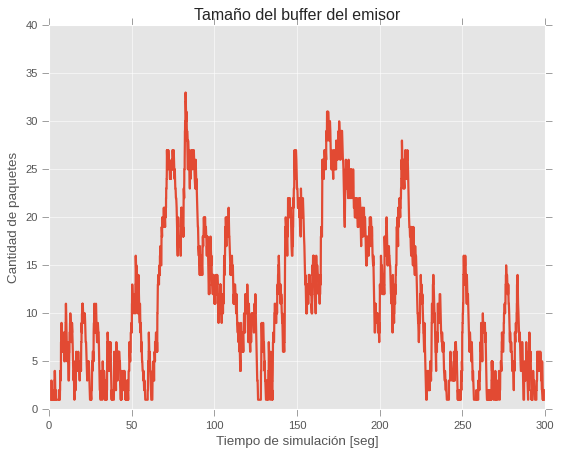

In [ ]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del emisor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 40])  # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_send_queue_case_I, buffer_send_queue_case_I)

print(f"Max buffer: {max(buffer_send_queue_case_I)}")
print(f"Min buffer: {min(buffer_send_queue_case_I)}")

## Caso II

### Gráficos de DataQueue

Max buffer: 100.0
Min buffer: 1.0


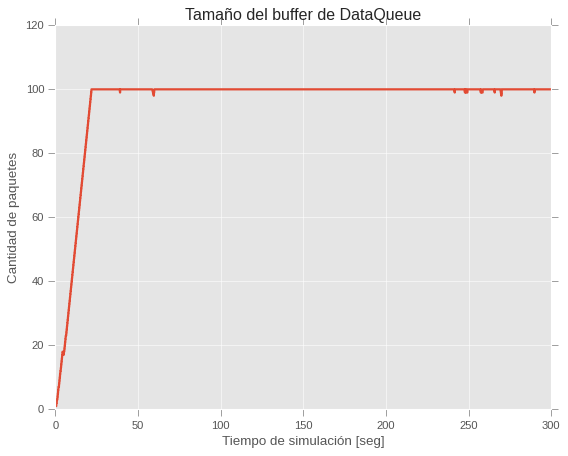

In [235]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer de DataQueue")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 120]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_data_queue, buffer_data_queue)

print(f"Max buffer: {max(buffer_data_queue)}")
print(f"Min buffer: {min(buffer_data_queue)}")

### Gráficos de RecQueue

Max buffer: 1.0
Min buffer: 1.0


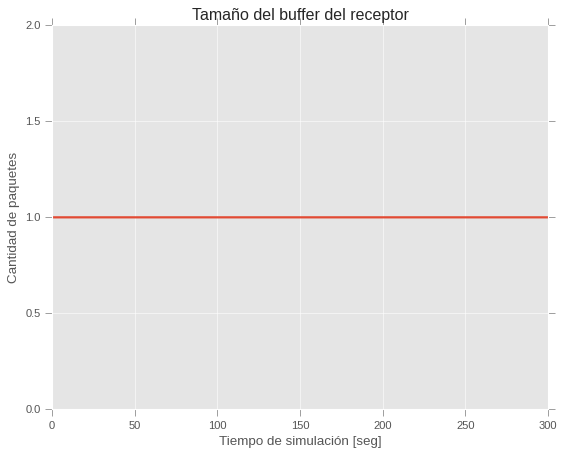

In [234]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del receptor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 2]) # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_rec_queue, buffer_rec_queue)

print(f"Max buffer: {max(buffer_rec_queue)}")
print(f"Min buffer: {min(buffer_rec_queue)}")

### Gráficos de SendQueue

Max buffer: 33.0
Min buffer: 1.0


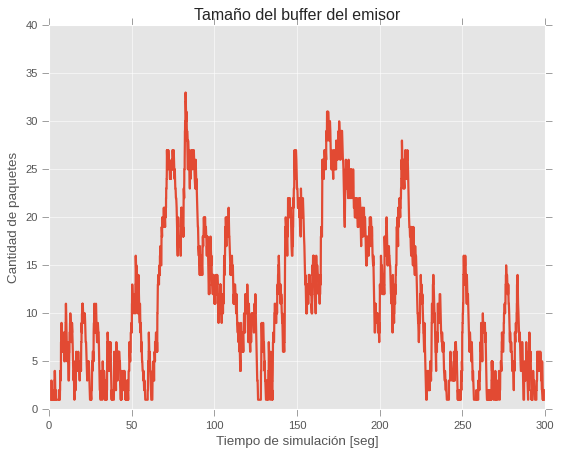

In [233]:
fig, ax = plt.subplots()

# Configuración
plt.title("Tamaño del buffer del emisor")
ax.set_xlabel("Tiempo de simulación [seg]")
ax.set_ylabel("Cantidad de paquetes")
plt.ylim([0, 40])  # Actualizo el rango de la y
# plt.style.available  # Ver los estilos disponibles
plt.style.use("ggplot")  # ggplot
ax.plot(time_send_queue, buffer_send_queue)

print(f"Max buffer: {max(buffer_send_queue)}")
print(f"Min buffer: {min(buffer_send_queue)}")

## Ejemplo

In [48]:
#fig, ax = plt.subplots() # creo una figura y divido en pares para dibujar
#plt.style.use("ggplot") # aplico un estilo de graficos
#plt.style.available -> para ver estilos posibles
# ax.plot(time_sink,buffer_sink)
# print(max(buffer_sink))
# print(min(buffer_sink))


In [49]:
# Los valores que sacamos estan como un solostring separados por comas por lo que tengo que convertirlos a listas para poder graficarlos
# time_gen = list(map(float,time_gen[0].split()))
# time_queue = list(map(float,time_queue[0].split()))
# time_sink = list(map(float,time_sink[0].split()))
# buffer_gen = list(map(float,buffer_gen[0].split()))
# buffer_queue = list(map(float,buffer_queue[0].split()))
# buffer_sink = list(map(float,buffer_sink[0].split()))

# print(time_gen)

# Análisis de los datos
<!-- Crucemos los datos a ver que pasa -->

In [259]:
LABEL_TX = "Sender"
LABEL_NX = "Subnetwork"
LABEL_RX = "Receiver"

## Caso I

In [293]:
CASE_NAME = "Caso I"

### Comparativas superpuestas

<function matplotlib.pyplot.show>

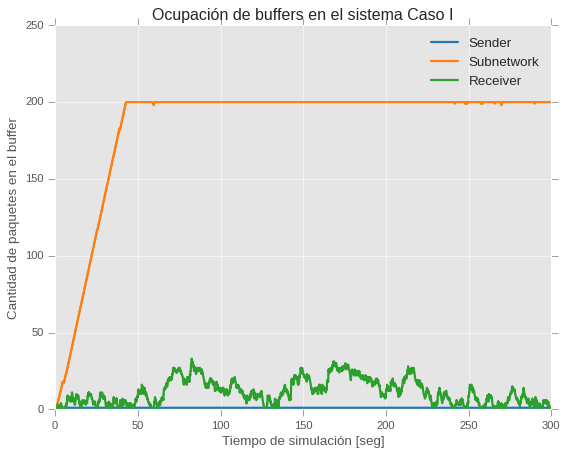

In [287]:
plt.plot(time_data_queue_case_I, buffer_data_queue_case_I, color='tab:blue', label=LABEL_TX)
plt.plot(time_rec_queue_case_I, buffer_rec_queue_case_I, color='tab:orange', label=LABEL_NX)
plt.plot(time_send_queue_case_I, buffer_send_queue_case_I, color='tab:green', label=LABEL_RX)
plt.ylim([0, 250])
plt.title(f"Ocupación de buffers en el sistema {CASE_NAME}")
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Comparativas separadas

<function matplotlib.pyplot.show>

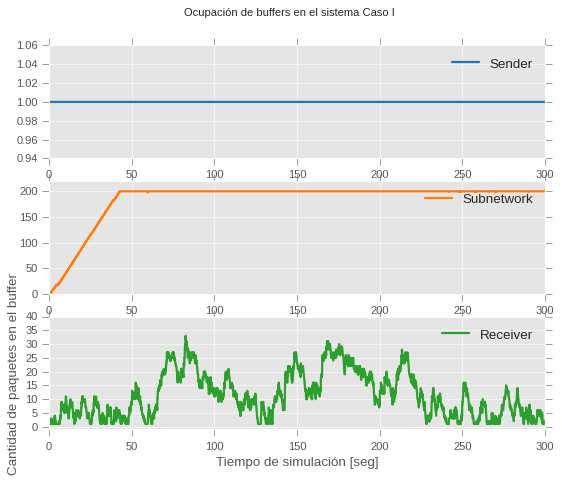

In [294]:
fig, ax = plt.subplots(3)
fig.suptitle(f"Ocupación de buffers en el sistema {CASE_NAME}")

ax[0].plot(time_data_queue_case_I, buffer_data_queue_case_I, color='tab:blue', label=LABEL_TX)
ax[0].legend()

ax[1].plot(time_rec_queue_case_I, buffer_rec_queue_case_I, color='tab:orange', label=LABEL_NX)
ax[1].legend()
ax[1].set_ylim([0, 220])

ax[2].plot(time_send_queue_case_I, buffer_send_queue_case_I, color='tab:green', label=LABEL_RX)
ax[2].set_ylim([-1, 40])


plt.title('')
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados vs paquetes consumidos

## Caso I Intv = 0.18

In [250]:
CASE_NAME = "Caso I Intv = 0.18"

### Comparativas superpuestas

<function matplotlib.pyplot.show>

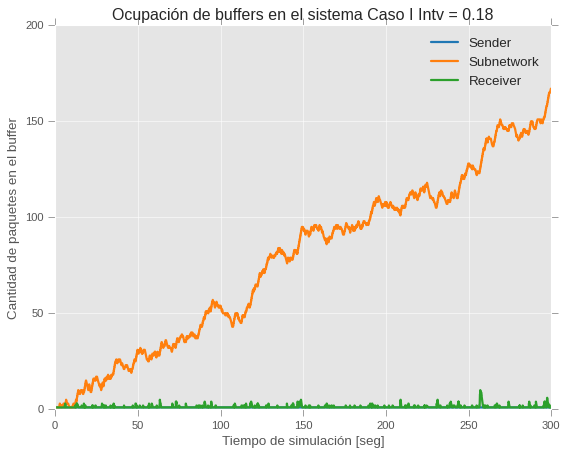

In [284]:
plt.plot(time_data_queue_case_I_cong, buffer_data_queue_case_I_cong, color='tab:blue', label=LABEL_TX)
plt.plot(time_rec_queue_case_I_cong, buffer_rec_queue_case_I_cong, color='tab:orange', label=LABEL_NX)
plt.plot(time_send_queue_case_I_cong, buffer_send_queue_case_I_cong, color='tab:green', label=LABEL_RX)
plt.ylim([0, 200])
plt.title(f"Ocupación de buffers en el sistema {CASE_NAME}")
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Comparativas separadas

<function matplotlib.pyplot.show>

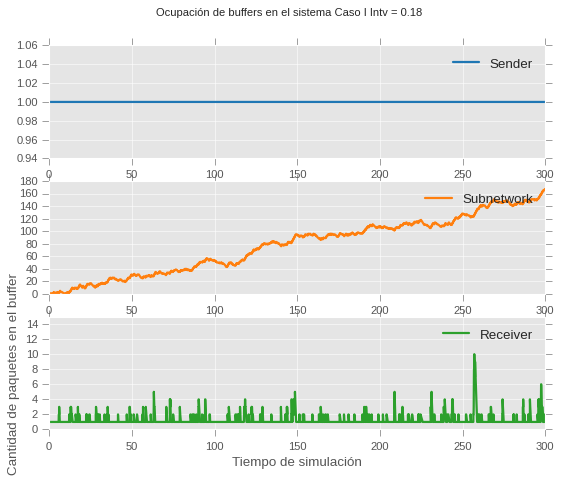

In [275]:
fig, ax = plt.subplots(3)
fig.suptitle(f"Ocupación de buffers en el sistema {CASE_NAME}")

ax[0].plot(time_data_queue_case_I_cong, buffer_data_queue_case_I_cong, color='tab:blue', label=LABEL_TX)
ax[0].legend()

ax[1].plot(time_rec_queue_case_I_cong, buffer_rec_queue_case_I_cong, color='tab:orange', label=LABEL_NX)
ax[1].legend()

ax[2].plot(time_send_queue_case_I_cong, buffer_send_queue_case_I_cong, color='tab:green', label=LABEL_RX)
ax[2].set_ylim([0, 15])

plt.title('')
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados vs paquetes consumidos

## Caso II

In [295]:
CASE_NAME = "Caso II"

### Comparativas superpuestas



<function matplotlib.pyplot.show>

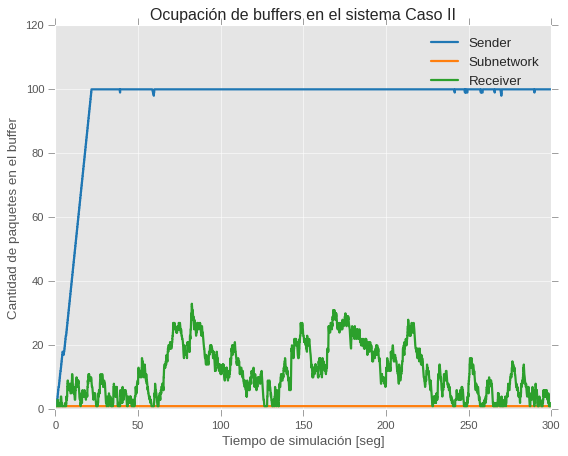

In [296]:
plt.plot(time_data_queue, buffer_data_queue, color='tab:blue', label=LABEL_TX)
plt.plot(time_rec_queue, buffer_rec_queue, color='tab:orange', label=LABEL_NX)
plt.plot(time_send_queue, buffer_send_queue, color='tab:green', label=LABEL_RX)
plt.ylim([0, 120])
plt.title(f"Ocupación de buffers en el sistema {CASE_NAME}")
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Comparativas separadas

<function matplotlib.pyplot.show>

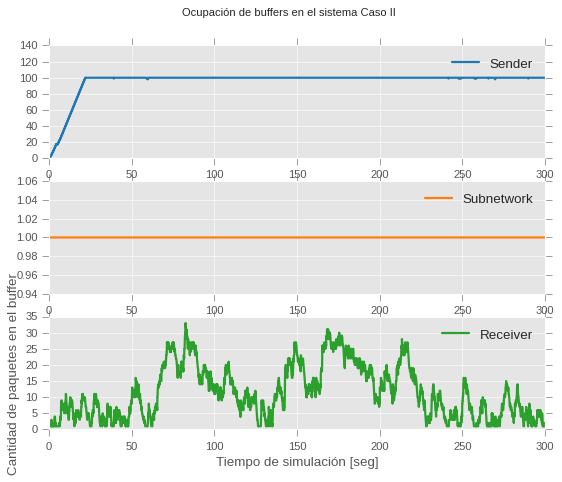

In [297]:
fig, ax = plt.subplots(3)
fig.suptitle(f"Ocupación de buffers en el sistema {CASE_NAME}")

ax[0].plot(time_data_queue, buffer_data_queue, color='tab:blue', label=LABEL_TX)
ax[0].legend()
ax[0].set_ylim([0, 140])

ax[1].plot(time_rec_queue, buffer_rec_queue, color='tab:orange', label=LABEL_NX)
ax[1].legend()

ax[2].plot(time_send_queue, buffer_send_queue, color='tab:green', label=LABEL_RX)

plt.title('')
plt.xlabel("Tiempo de simulación [seg]")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados vs paquetes consumidos

In [117]:
# Agregue en el modelo un contador de paquetes generados y paquetes consumidos
# Sacando la info
time_gen = data['vectime'].loc[[22]].tolist()
packets_gen = data['vecvalue'].loc[[22]].tolist()
time_sink = data['vectime'].loc[[27]].tolist()
packets_sink = data['vecvalue'].loc[[27]].tolist()

# Dividiendo en listas
time_gen = list(map(float, time_gen[0].split()))
packets_sink = list(map(float, packets_sink[0].split()))
time_sink = list(map(float, time_sink[0].split()))
packets_gen = list(map(float, packets_gen[0].split()))

plt.figure(figsize=(10,6))
seaborn.barplot(
    x=['Enviados', 'Recibidos'],
    y=[len(packets_gen), len(packets_sink)])
print(len(packets_gen))
print(len(packets_sink))

KeyError: ignored

## Ejemplo

<function matplotlib.pyplot.show>

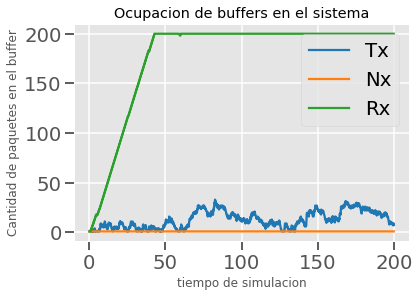

In [ ]:
plt.plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
plt.plot(time_queue,buffer_queue, color='tab:orange', label="Nx")
plt.plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

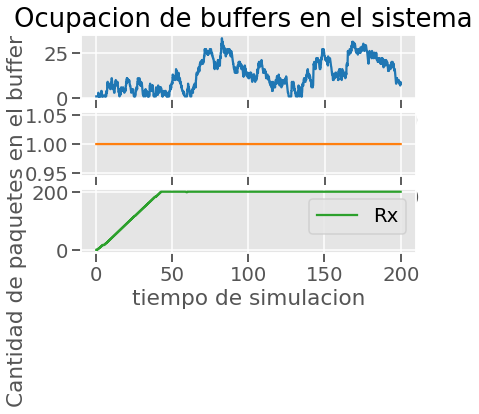

In [ ]:
fig, ax = plt.subplots(3)
fig.suptitle('Ocupacion de buffers en el sistema')
ax[0].plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
ax[1].plot(time_queue,buffer_queue, color='tab:orange', label="Nx")
ax[2].plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

1979
998


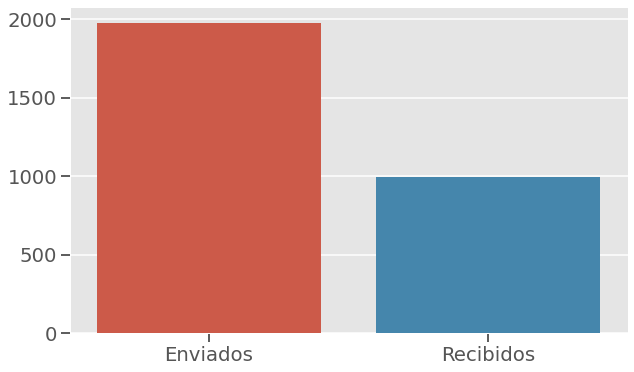

In [ ]:
#Agregue en el modelo un contador de paquetes generados y paquetes consumidos
#sacando la info
time_gen = data['vectime'].loc[[22]].tolist()
packets_gen = data['vecvalue'].loc[[22]].tolist()
time_sink = data['vectime'].loc[[27]].tolist()
packets_sink = data['vecvalue'].loc[[27]].tolist()

#dividiendo en listas
time_gen = list(map(float,time_gen[0].split()))
packets_sink = list(map(float,packets_sink[0].split()))
time_sink = list(map(float,time_sink[0].split()))
packets_gen = list(map(float,packets_gen[0].split()))

plt.figure(figsize=(10,6))
seaborn.barplot(
    x=['Enviados', 'Recibidos'],
    y=[len(packets_gen), len(packets_sink)])
print(len(packets_gen))
print(len(packets_sink))

Esto es muy muy muy poquito comparado a todo lo que se puede hacer con estas librerías. De nuevo, 
la idea es que experimenten, investigan y conozcan la existencia de la herramienta.

https://seaborn.pydata.org/
https://pandas.pydata.org/